In [2]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Modelling
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
# STEP 1) LOAD RAW DATAFRAME

# Read DataFrame
data_separator = ";"
input_path = "/workspaces/logistic-regression-project/data/raw/bank-marketing-campaign-data.csv"
df_raw=pd.read_csv(input_path, sep = data_separator)

In [4]:
# STEP 2) EXPLORE DATAFRAME

# Copy  of previous DataFrame
df_S2 = df_raw.copy()

# Print info
print(f"- ℹ️ Shape of the original DataFrame: {df_S2.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S2.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S2.info())

# Count attributes
df_S2_summary = pd.DataFrame({
    "Column": df_S2.columns,
    "Unique_Count": df_S2.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S2_summary)

- ℹ️ Shape of the original DataFrame: (41188, 21)
- ℹ️ Content of the original DataFrame:


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.pric

None

 - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0              age            78
1              job            12
2          marital             4
3        education             8
4          default             3
5          housing             3
6             loan             3
7          contact             2
8            month            10
9      day_of_week             5
10        duration          1544
11        campaign            42
12           pdays            27
13        previous             8
14        poutcome             3
15    emp.var.rate            10
16  cons.price.idx            26
17   cons.conf.idx            26
18       euribor3m           316
19     nr.employed            11
20               y             2

CONCLUSIONS:
- contact, month, day_of_week, pdays are assumed as not relevant -> Drop them
- there are not non-null values in the data -> nice
- NUMERIC and CATEGORY variables are given by the exercise
- y is going to be the target variable of the analysis

In [5]:
# STEP 3) FIND DUPLICATES

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

num_duplicates=df_S3.duplicated().sum()
if num_duplicates == 0:
    df_S3=df_S3
    print("- ✅ Original DataFrame does not contain duplicates:")
else:
    df_S3_duplicates=df_S3[df_S3.duplicated()] #Works as bool mask
    df_S3=df_S3.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")
    print("- ℹ️ These are the dropped duplicates:")
    display(df_S3_duplicates)


- ⚠️ Original DataFrame contained 12 duplicates that have been dropped

- ℹ️ These are the dropped duplicates:


age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1266   telephone   may         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32516   cellular   may         fri  ...         4    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1266   nonexistent          1.1          93.994          -36.4      4.855   
12261  nonexistent          1.4          93.918          -42.7      4.966   
14234  nonexistent          1.4          93.918          -42.7      4.962   
16956  nonexistent          1.4          93.918          -42.7      4.962   
18465  nonexistent          1.4          93.918          -42.7      4.968   
20216  nonexistent          1.4          93.444          -36.1      4.965   
20534  nonexistent          1.4          93.444          -36.1      4.966   
25217  nonexistent         -0.1          93.200          -42.0      4.153   
28477  nonexistent         -1.8          93.075          -47.1      1.423   
32516  nonexistent         -1.8          92.893          -46.2      1.313   
36951  nonexistent         -2.9          92.469          -33.6      1.072   
38281  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1266        5191.0   no  
12261       5228.1   no  
14234       5228.1   no  
16956       5228.1   no  
18465       5228.1   no  
20216       5228.1   no  
20534       5228.1   no  
25217       5195.8   no  
28477       5099.1   no  
32516       5099.1   no  
36951       5076.2  yes  
38281       5017.5   no  

[12 rows x 21 columns]

In [17]:
# STEP 4) SELECT RELEVANT ATTRIBUTES

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# Drop non-relevant attributes
df_S4=df_S4.drop(labels=["contact","month","day_of_week","pdays"], axis =1)

print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S3.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S4.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S4.shape}")
display(df_S4.head())

- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 21
 - ℹ️ Cleaned df's  columns: 17
 - ℹ️ Final DataFrame shape: (41188, 17)


age        job  marital    education  default housing loan  duration  \
0   56  housemaid  married     basic.4y       no      no   no       261   
1   57   services  married  high.school  unknown      no   no       149   
2   37   services  married  high.school       no     yes   no       226   
3   40     admin.  married     basic.6y       no      no   no       151   
4   56   services  married  high.school       no      no  yes       307   

   campaign  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1         0  nonexistent           1.1          93.994   
1         1         0  nonexistent           1.1          93.994   
2         1         0  nonexistent           1.1          93.994   
3         1         0  nonexistent           1.1          93.994   
4         1         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  
0          -36.4      4.857       5191.0  no  
1          -36.4      4.857       5191.0  no  
2          -36.4      4.857       5191.0  no  
3          -36.4      4.857       5191.0  no  
4          -36.4      4.857       5191.0  no

In [18]:
# STEP 5) ATTRIBUTE'S DATA TYPE AND TARGET VARIABLE

# Copy  of previous DataFrame
df_S5 = df_S4.copy()

# List of columns
columns = df_S5.columns.tolist()

 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC
var_type_proposal_threshold = 0.01

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S5.columns:
    col_data = df_S5[col].dropna()
    total_rows = len(df_S5)

    # Skip empty columns
    if total_rows == 0:
        continue
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S5[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

- ℹ️ Proposed CATEGORY Attributes: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']
- ℹ️ Proposed NUMERIC Attributes: ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


CONCLUSIONS:
- Proposal of CATEGORY vs NUMERIC values matches perfectly the types given by the exercise

In [19]:
# Confirm categories and target variable
category_var = category_var_auto
numeric_var = numeric_var_auto
y_var = "y"

In [20]:
# Confirm setup before plottings
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)

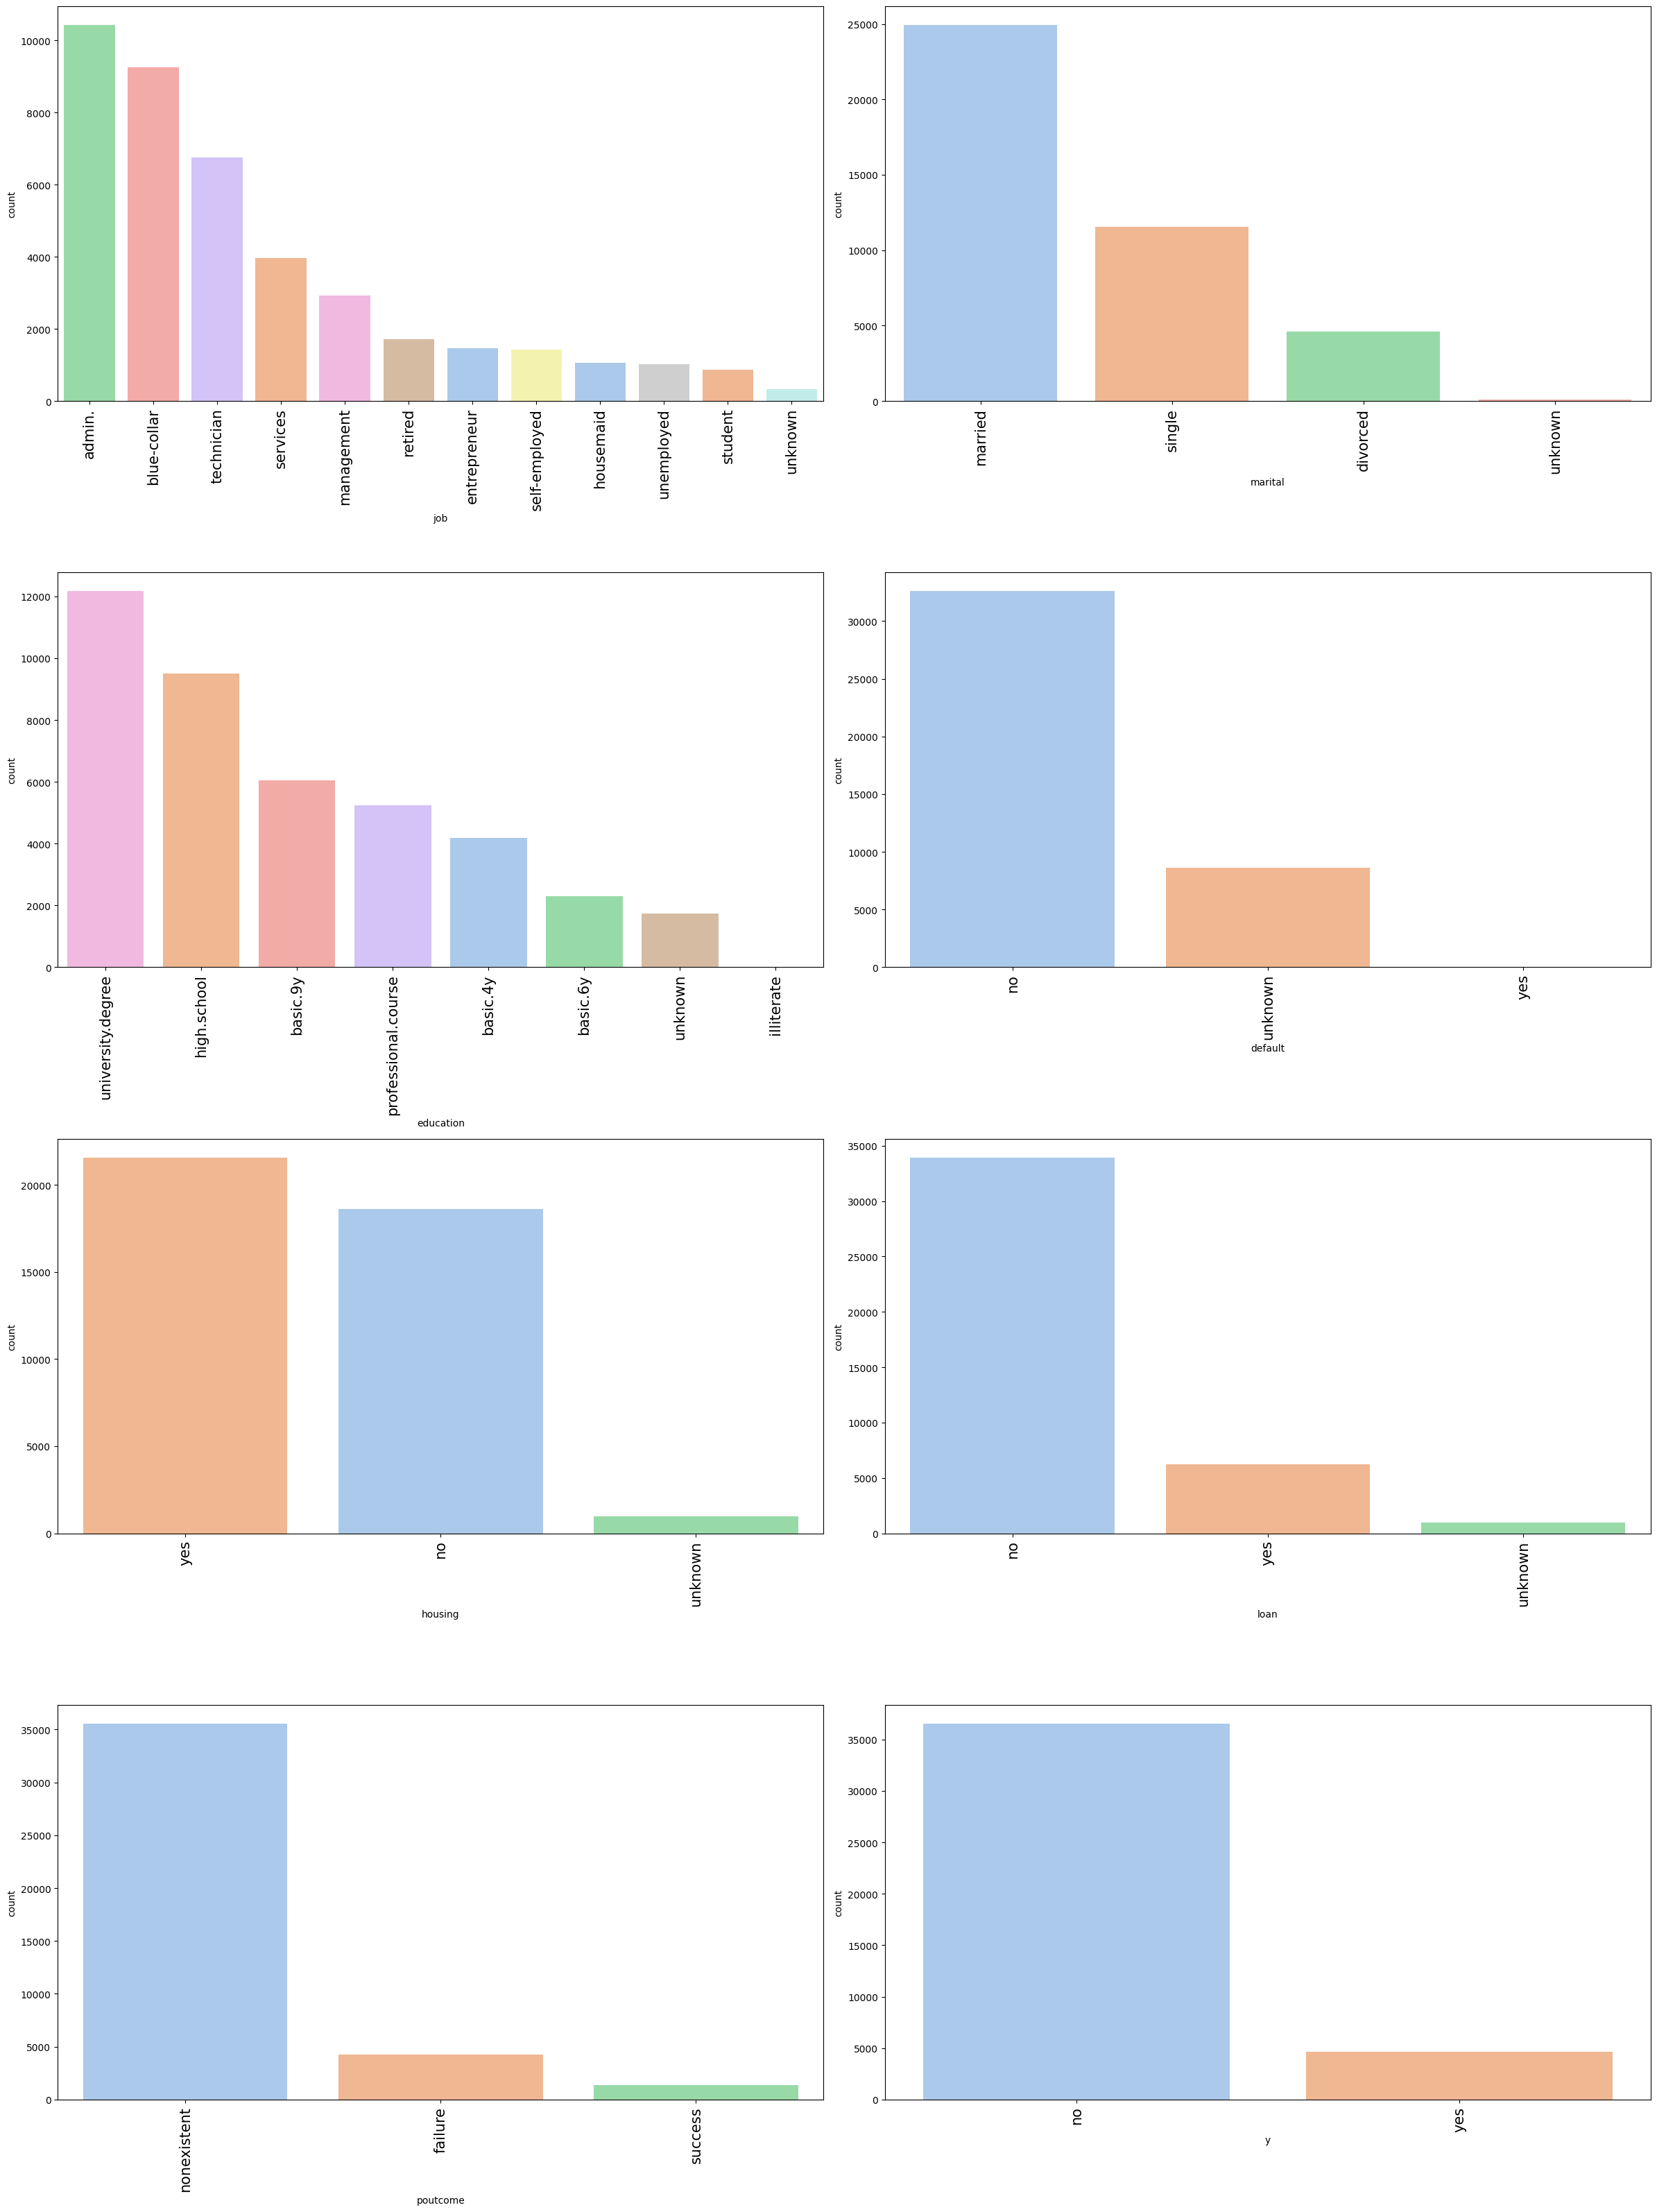

In [10]:
# STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var

# Copy  of previous DataFrame
df_S6_1 = df_S5.copy()

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
)
    
# Flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:
    # Count unique values
    unique_count = df_S6_1[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S6_1[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S6_1[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax = axes[idx],
        data = df_S6_1,
        x = col,
        hue = col,
        palette = my_palette,
        order = order,
        legend = False
    ).tick_params(axis='x', rotation=90, labelsize=my_font_size)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize=my_font_size,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

CONCLUSIONS:
- admin, blue-collar and technitian are the most common jobs
- there are more married than sigle + divorced together
- university followed by highschool are the most common educations
- no client has already a credit loan, but for around 25% of data this is unknown (default)
- there are more clients with a housing loan than not having it (housing)
- most of client do not have a personal loan (loan)
- the were more failures than success in previous campaign, yet it is unexisintg for most of clients
- only around 10% ends up signing long-term deposit

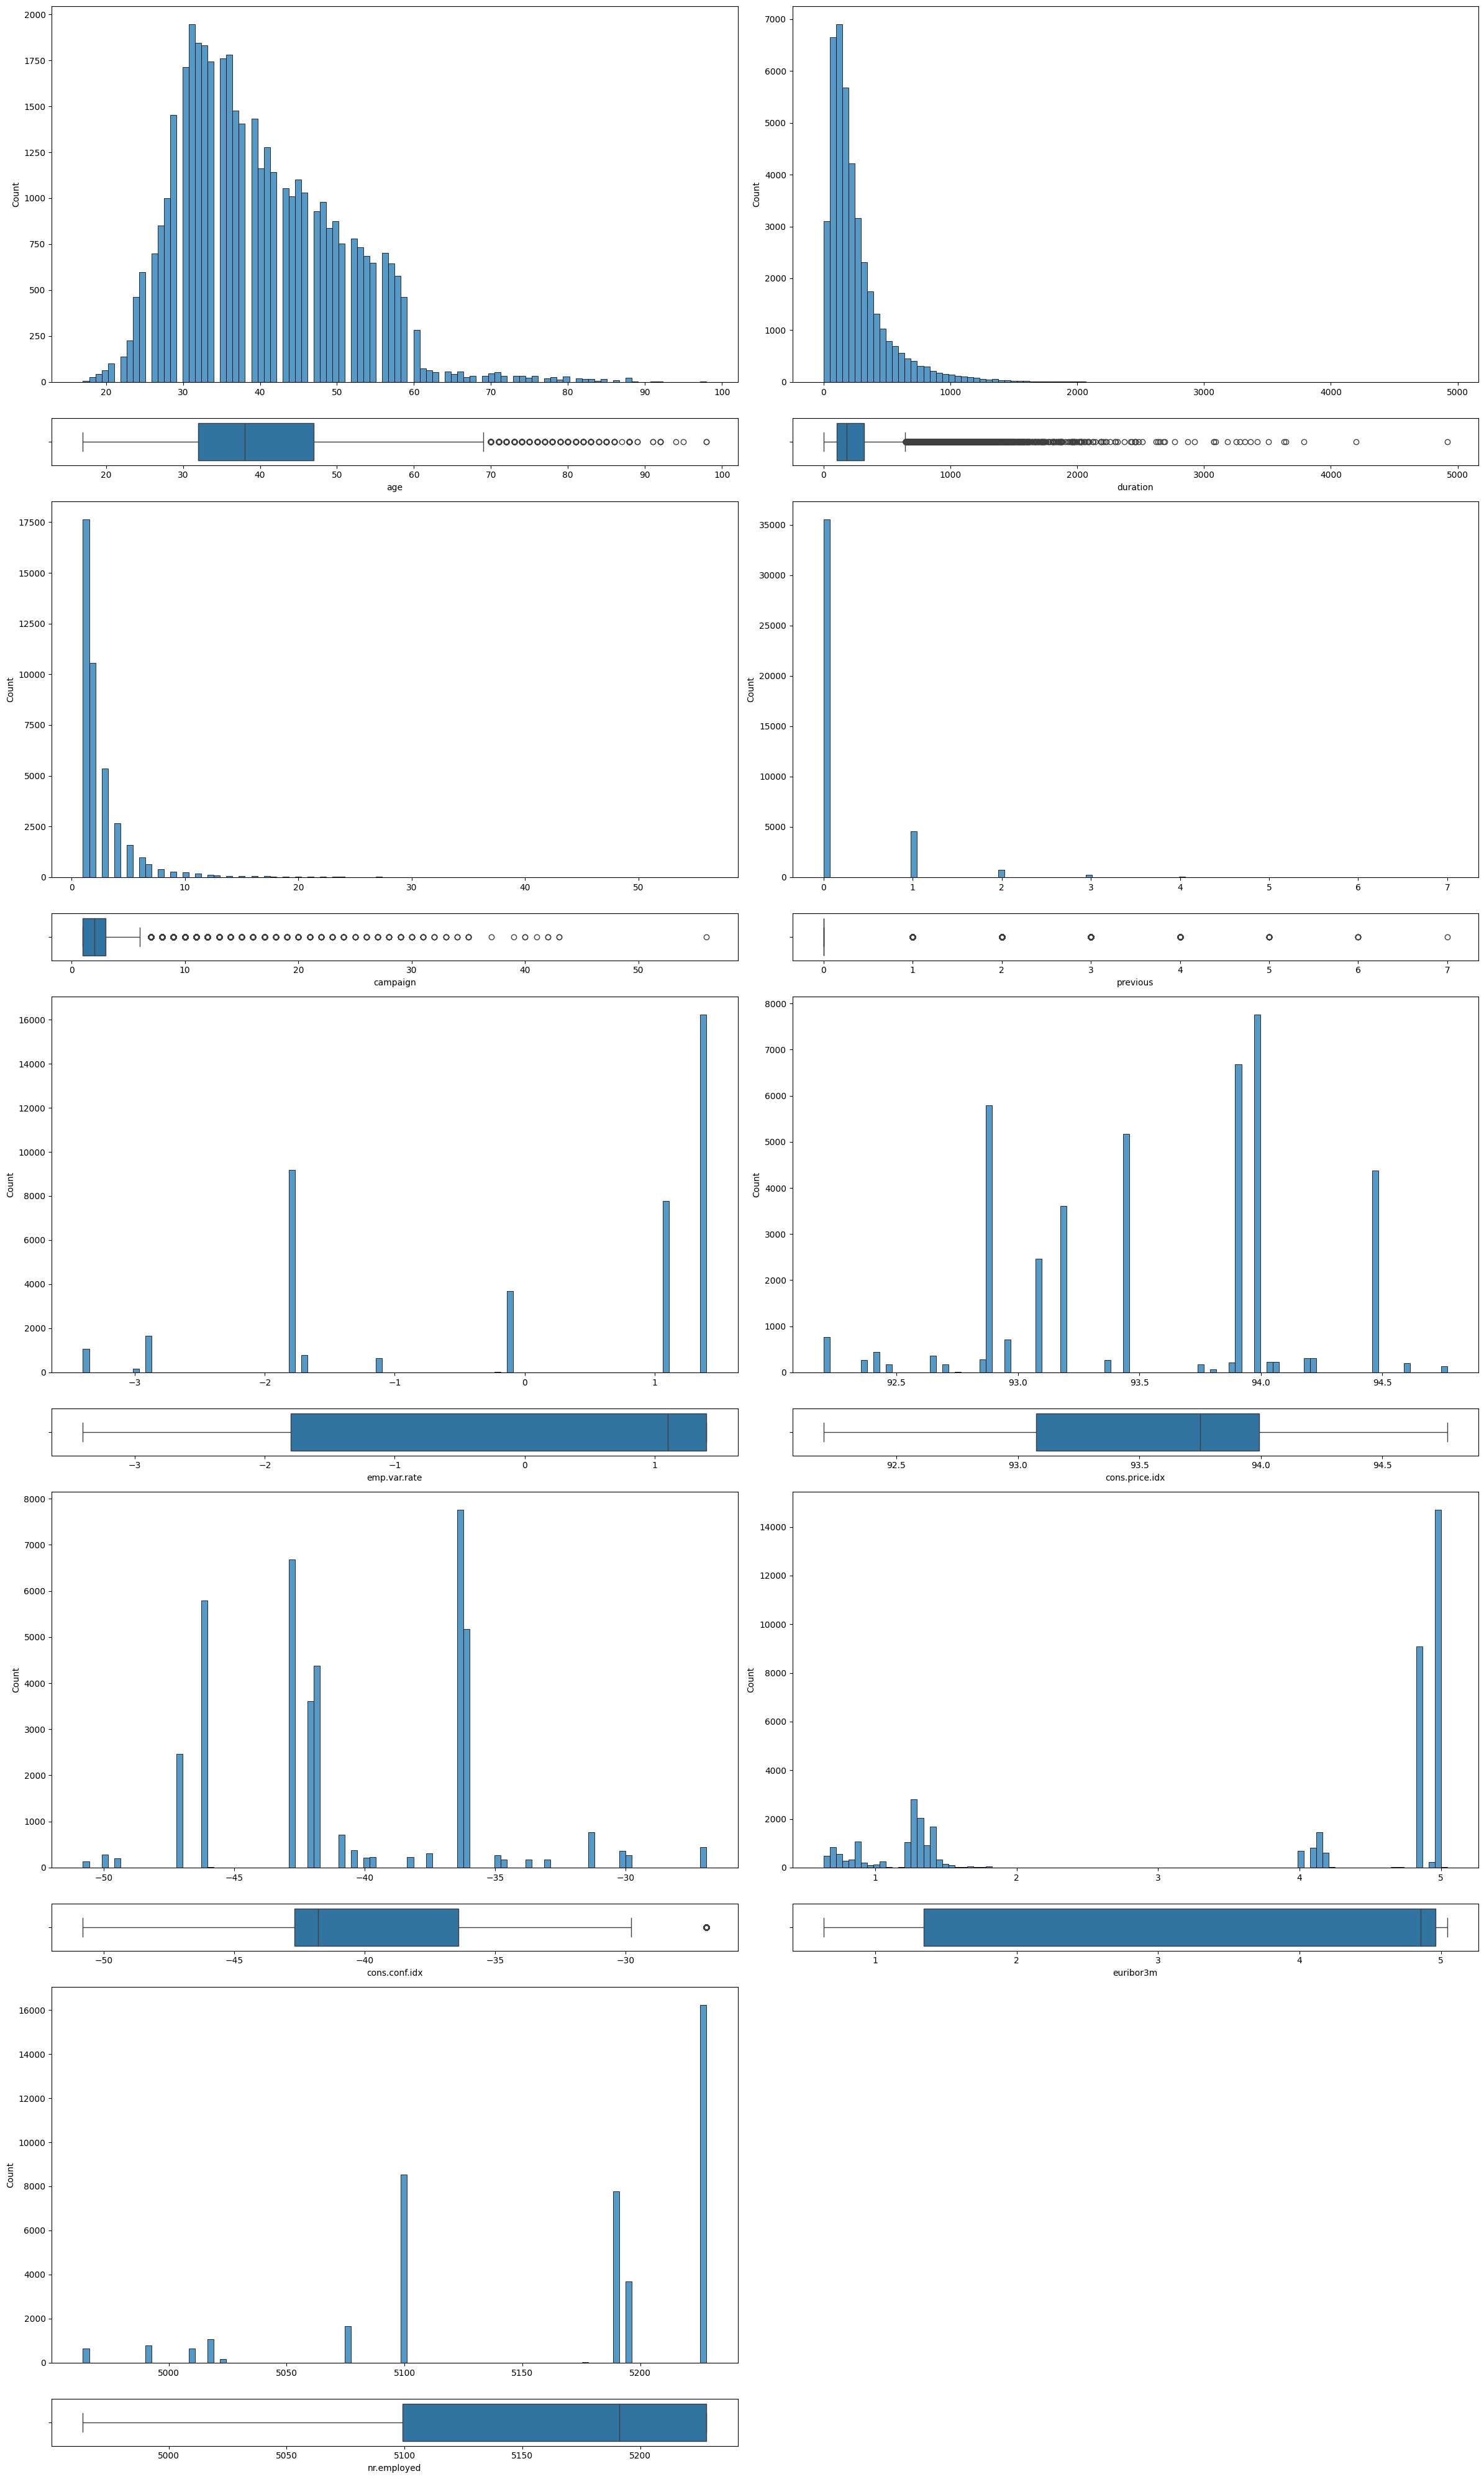

In [11]:
# STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var

# Copy  of previous DataFrame
df_S6_2 = df_S5.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols =  num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 0.5] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Histogram (top)
        sns.histplot(
            ax = axes[row * 2, col],
            data = df_S6_2,
            x = var_to_plot[var_idx],
            bins = num_bins
        ).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(
            ax=axes[row * 2 + 1, col],
            data=df_S6_2,
            x = var_to_plot[var_idx]
        )
        var_idx += 1

# Adjust layout and display
plt.tight_layout()
plt.show()

CONCLUSIONS:
- Age above 70 are consider outliers, and the bank is not interested in such old clients
- duration and campaign present also a lot of outliers

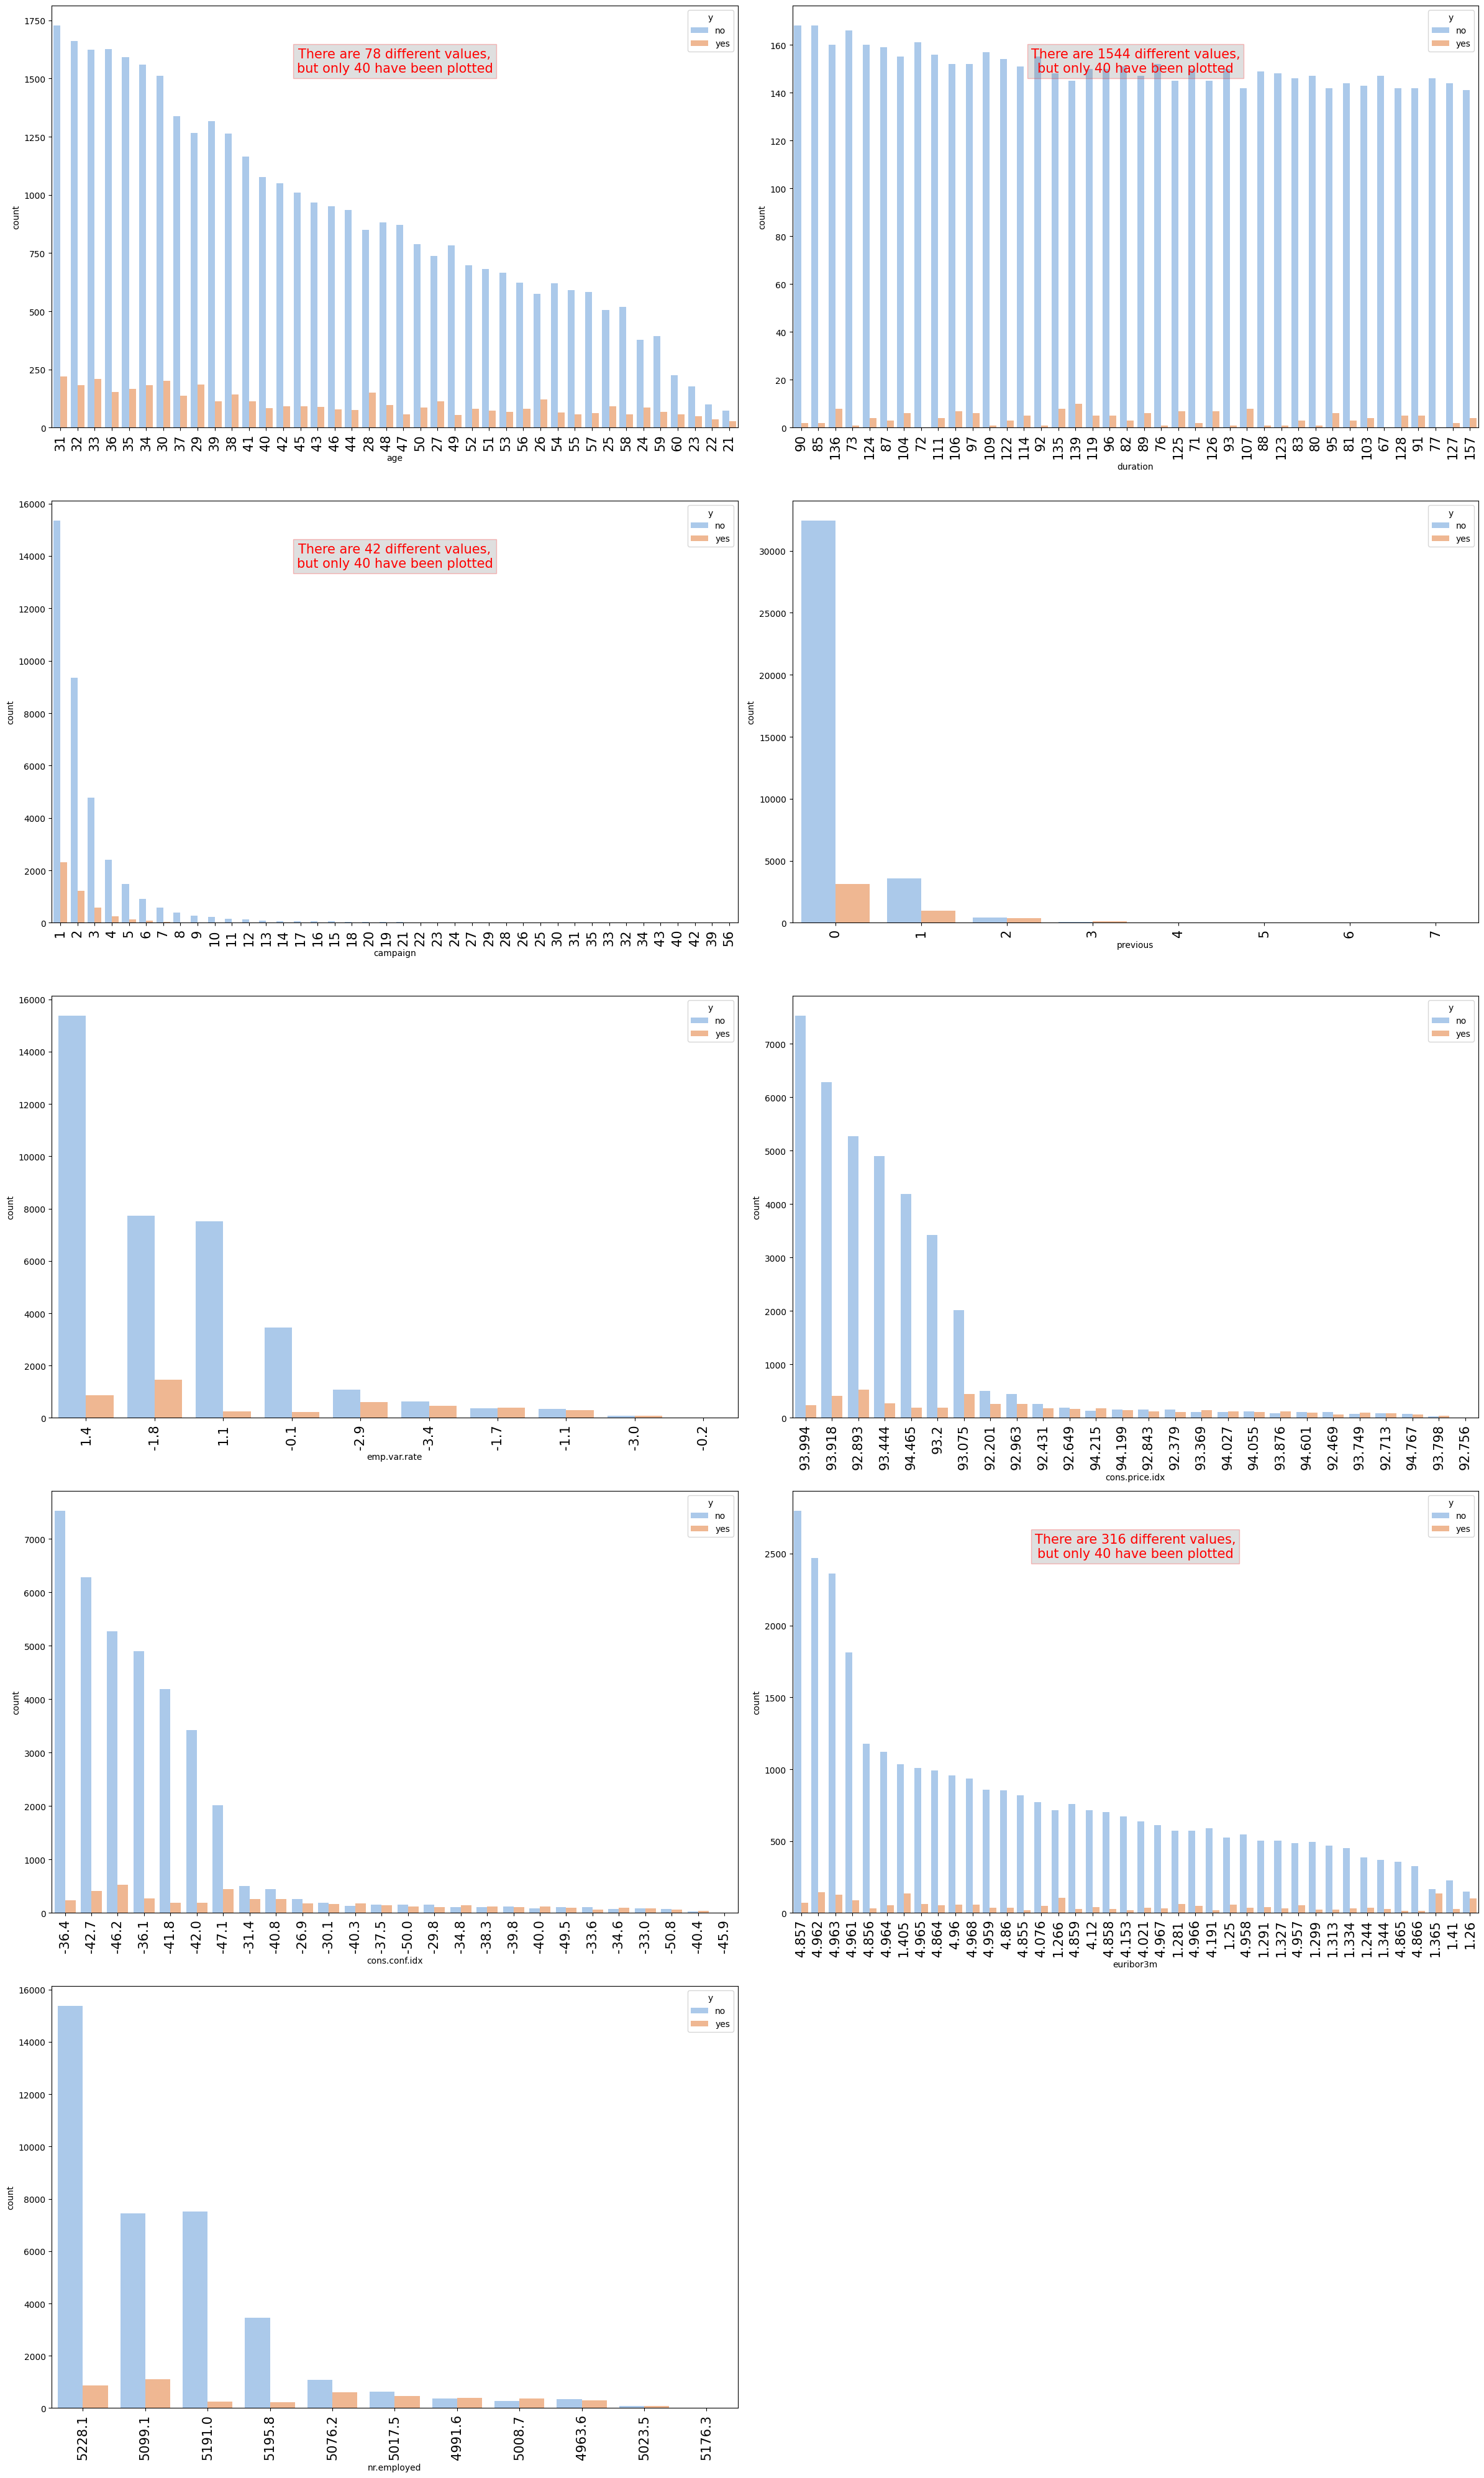

In [12]:
# STEP 7.1) MULTIVARIANT ANALYIS - CATEGORY_var VS COMBINED CATEGORY_target (Countplot)
    
# Copy  of previous DataFrame
df_S7_1 = df_S5.copy()

hue_order = sorted(df_S7_1[y_var].dropna().unique().tolist()) # Determine hue order dynamically
var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
)
    
# Flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:
    # Count unique values
    unique_count = df_S7_1[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S7_1[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S7_1[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax = axes[idx],
        data = df_S7_1,
        x = col,
        hue = y_var,
        hue_order = hue_order,
        palette = my_palette,
        order = order,
    ).tick_params(axis='x', rotation=90, labelsize=my_font_size)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize=my_font_size,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

CONCLUSIONS:
- As said before, clients ends up mostly not singing lon-term deposit regardless the category

In [13]:
# STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)

# Copy  of previous DataFrame
df_S7_2 = df_S5.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = len(var_to_plot) - 1 # Number of rows (one less than number of variables)

# Create subplots with two stacked plots (regplot + heatmap) per variable pair
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = len(var_to_plot) - 1,
    figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Flatten axes for easy handling
axes = np.array(axes)

# Track subplot usage
for row in range(num_rows):
    n_cols = len(var_to_plot) - row - 1 # Decreasing number of columns each row
    for col in range(n_cols):

        # Top: regplot
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_2,
            x = var_to_plot[row + col + 1],
            y = var_to_plot[row],
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        ).set_xlabel(var_to_plot[row + col + 1],fontsize=20)

        # Show Y label only for first plot in row
        if col == 0:
            axes[row * 2, col].set_ylabel(var_to_plot[row],fontsize=my_font_size)
        else:
            axes[row * 2, col].set_ylabel("")

        # Bottom: heatmap (correlation)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_2[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False,
            annot_kws = {"size": 20}
        )

    # Hide unused subplots on the right for this row
    for col in range(n_cols, len(var_to_plot) - 1):
        axes[row * 2, col].set_visible(False)
        axes[row * 2 + 1, col].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()

CONCLUSIONS:
- campaign is positive correlated in some degree with emp.var.rate, euribor3m and nr.emeployed
- previous is negative correlated in some degree with emp.var.rate, cons.conf.idx, euribor3m and nr.emeployed
- emp.var.rate is positive correlated in some degre with cons.conf.idx
- emp.var.rate is highly positive correlated with cons.price.idx
- emp.var.rate is heavily positive correlated with euribor3m and nr.employed -> noise for the model
- cons.price.idx is highly positive correlated with euribor3m and nr.employed
- cons.conf.idx is positive correlated in some degree with euribor3m
- euribor3m is heavily positive correlated with nr.employed -> noise for the model


- euribor3m and nr.employed are going to be dropped from the data because emp.var.rate is sufficient for the model, and we want to avoid noise

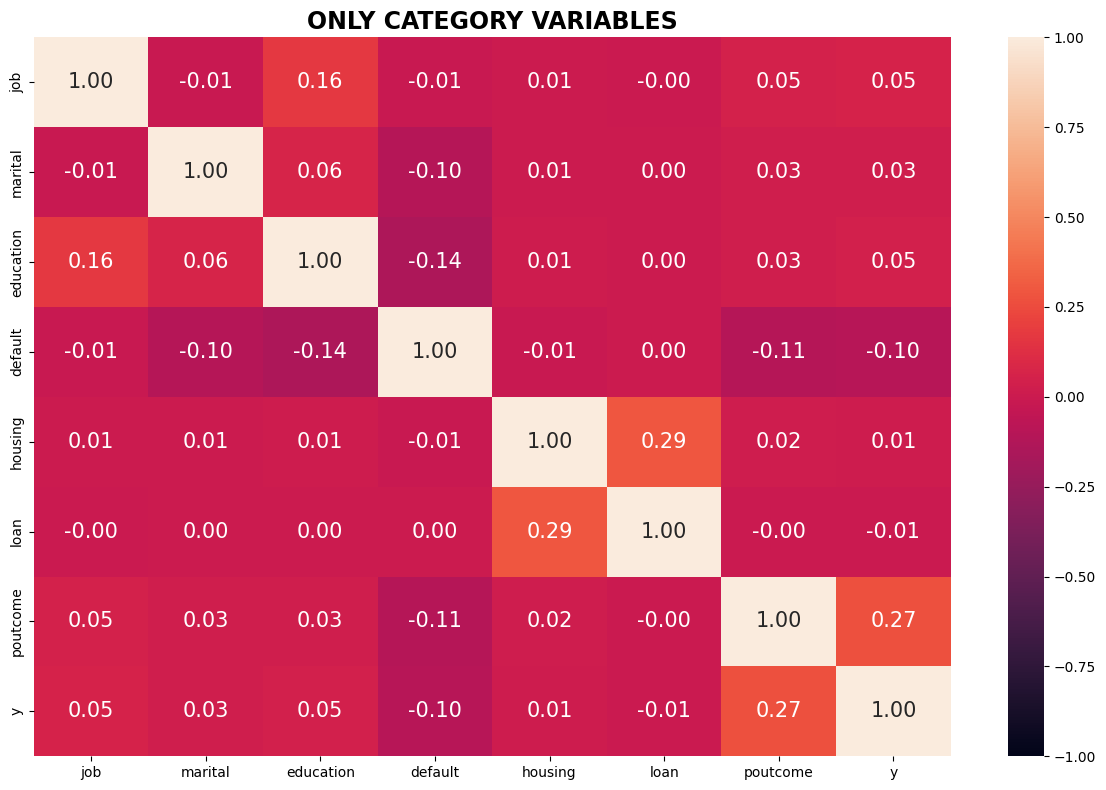

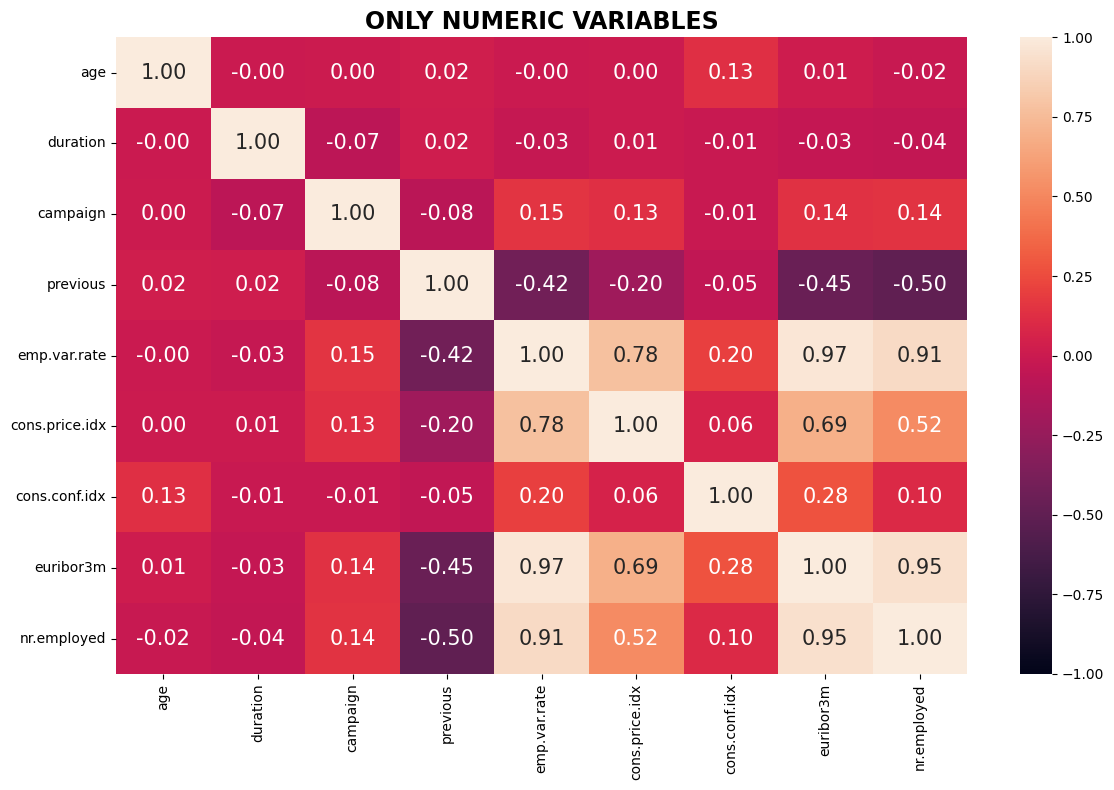

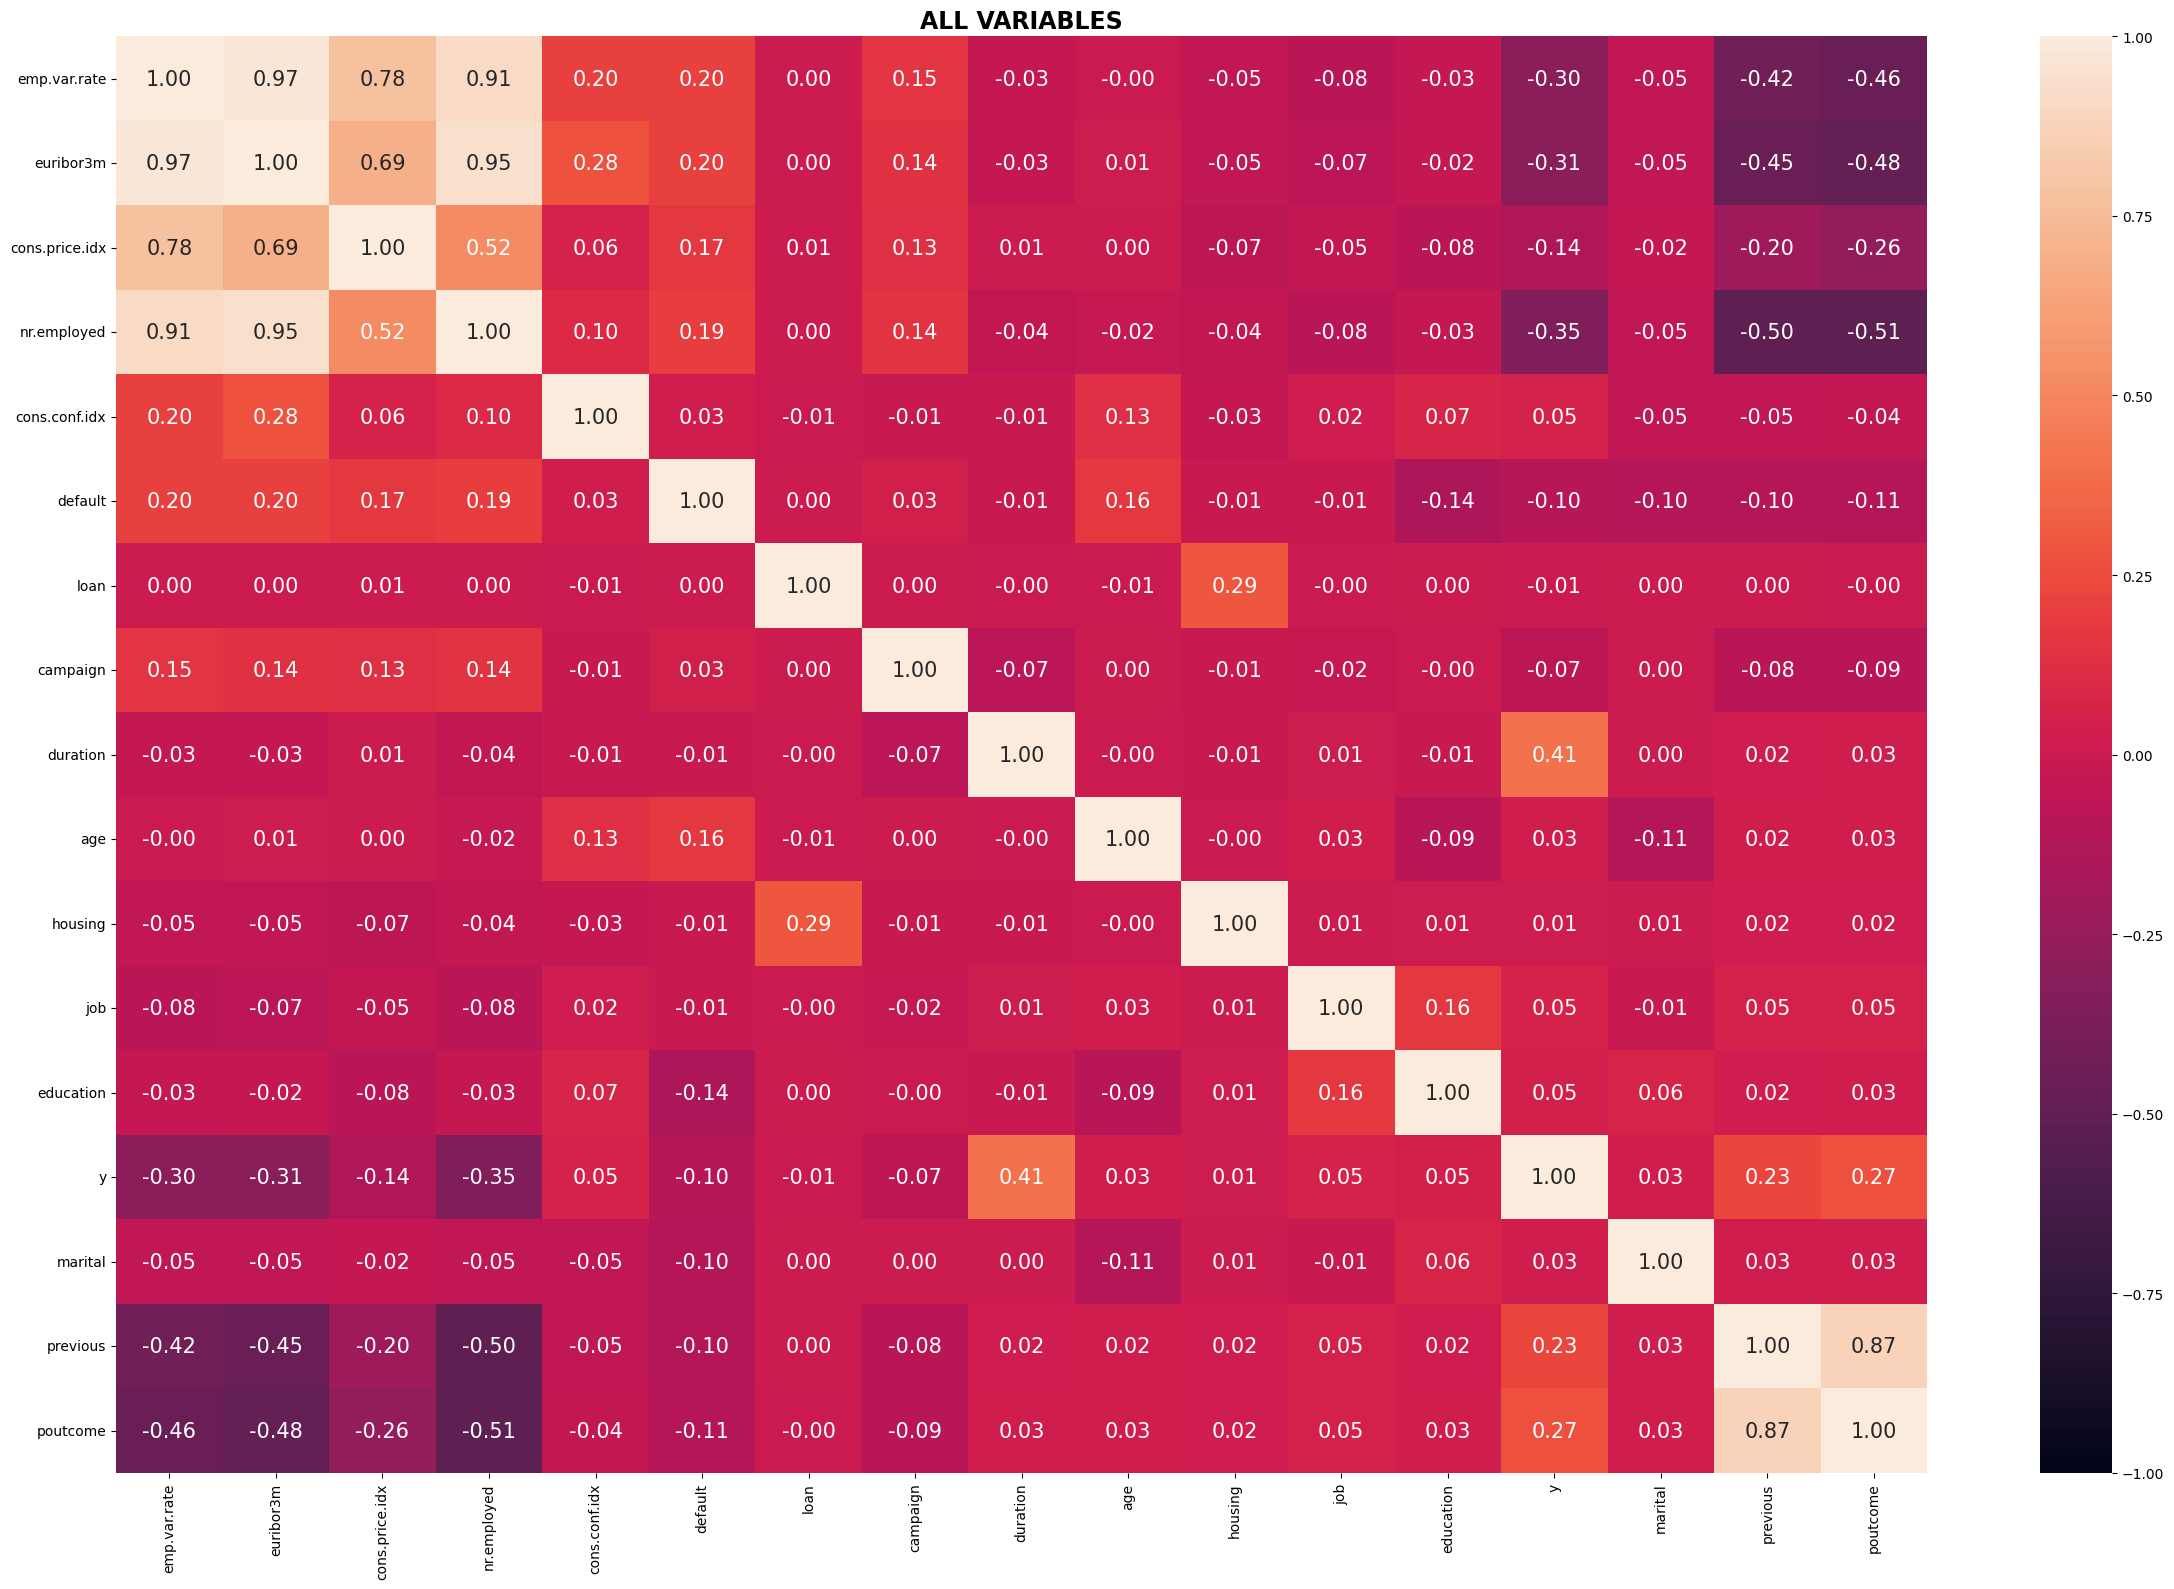

<Figure size 1200x800 with 0 Axes>

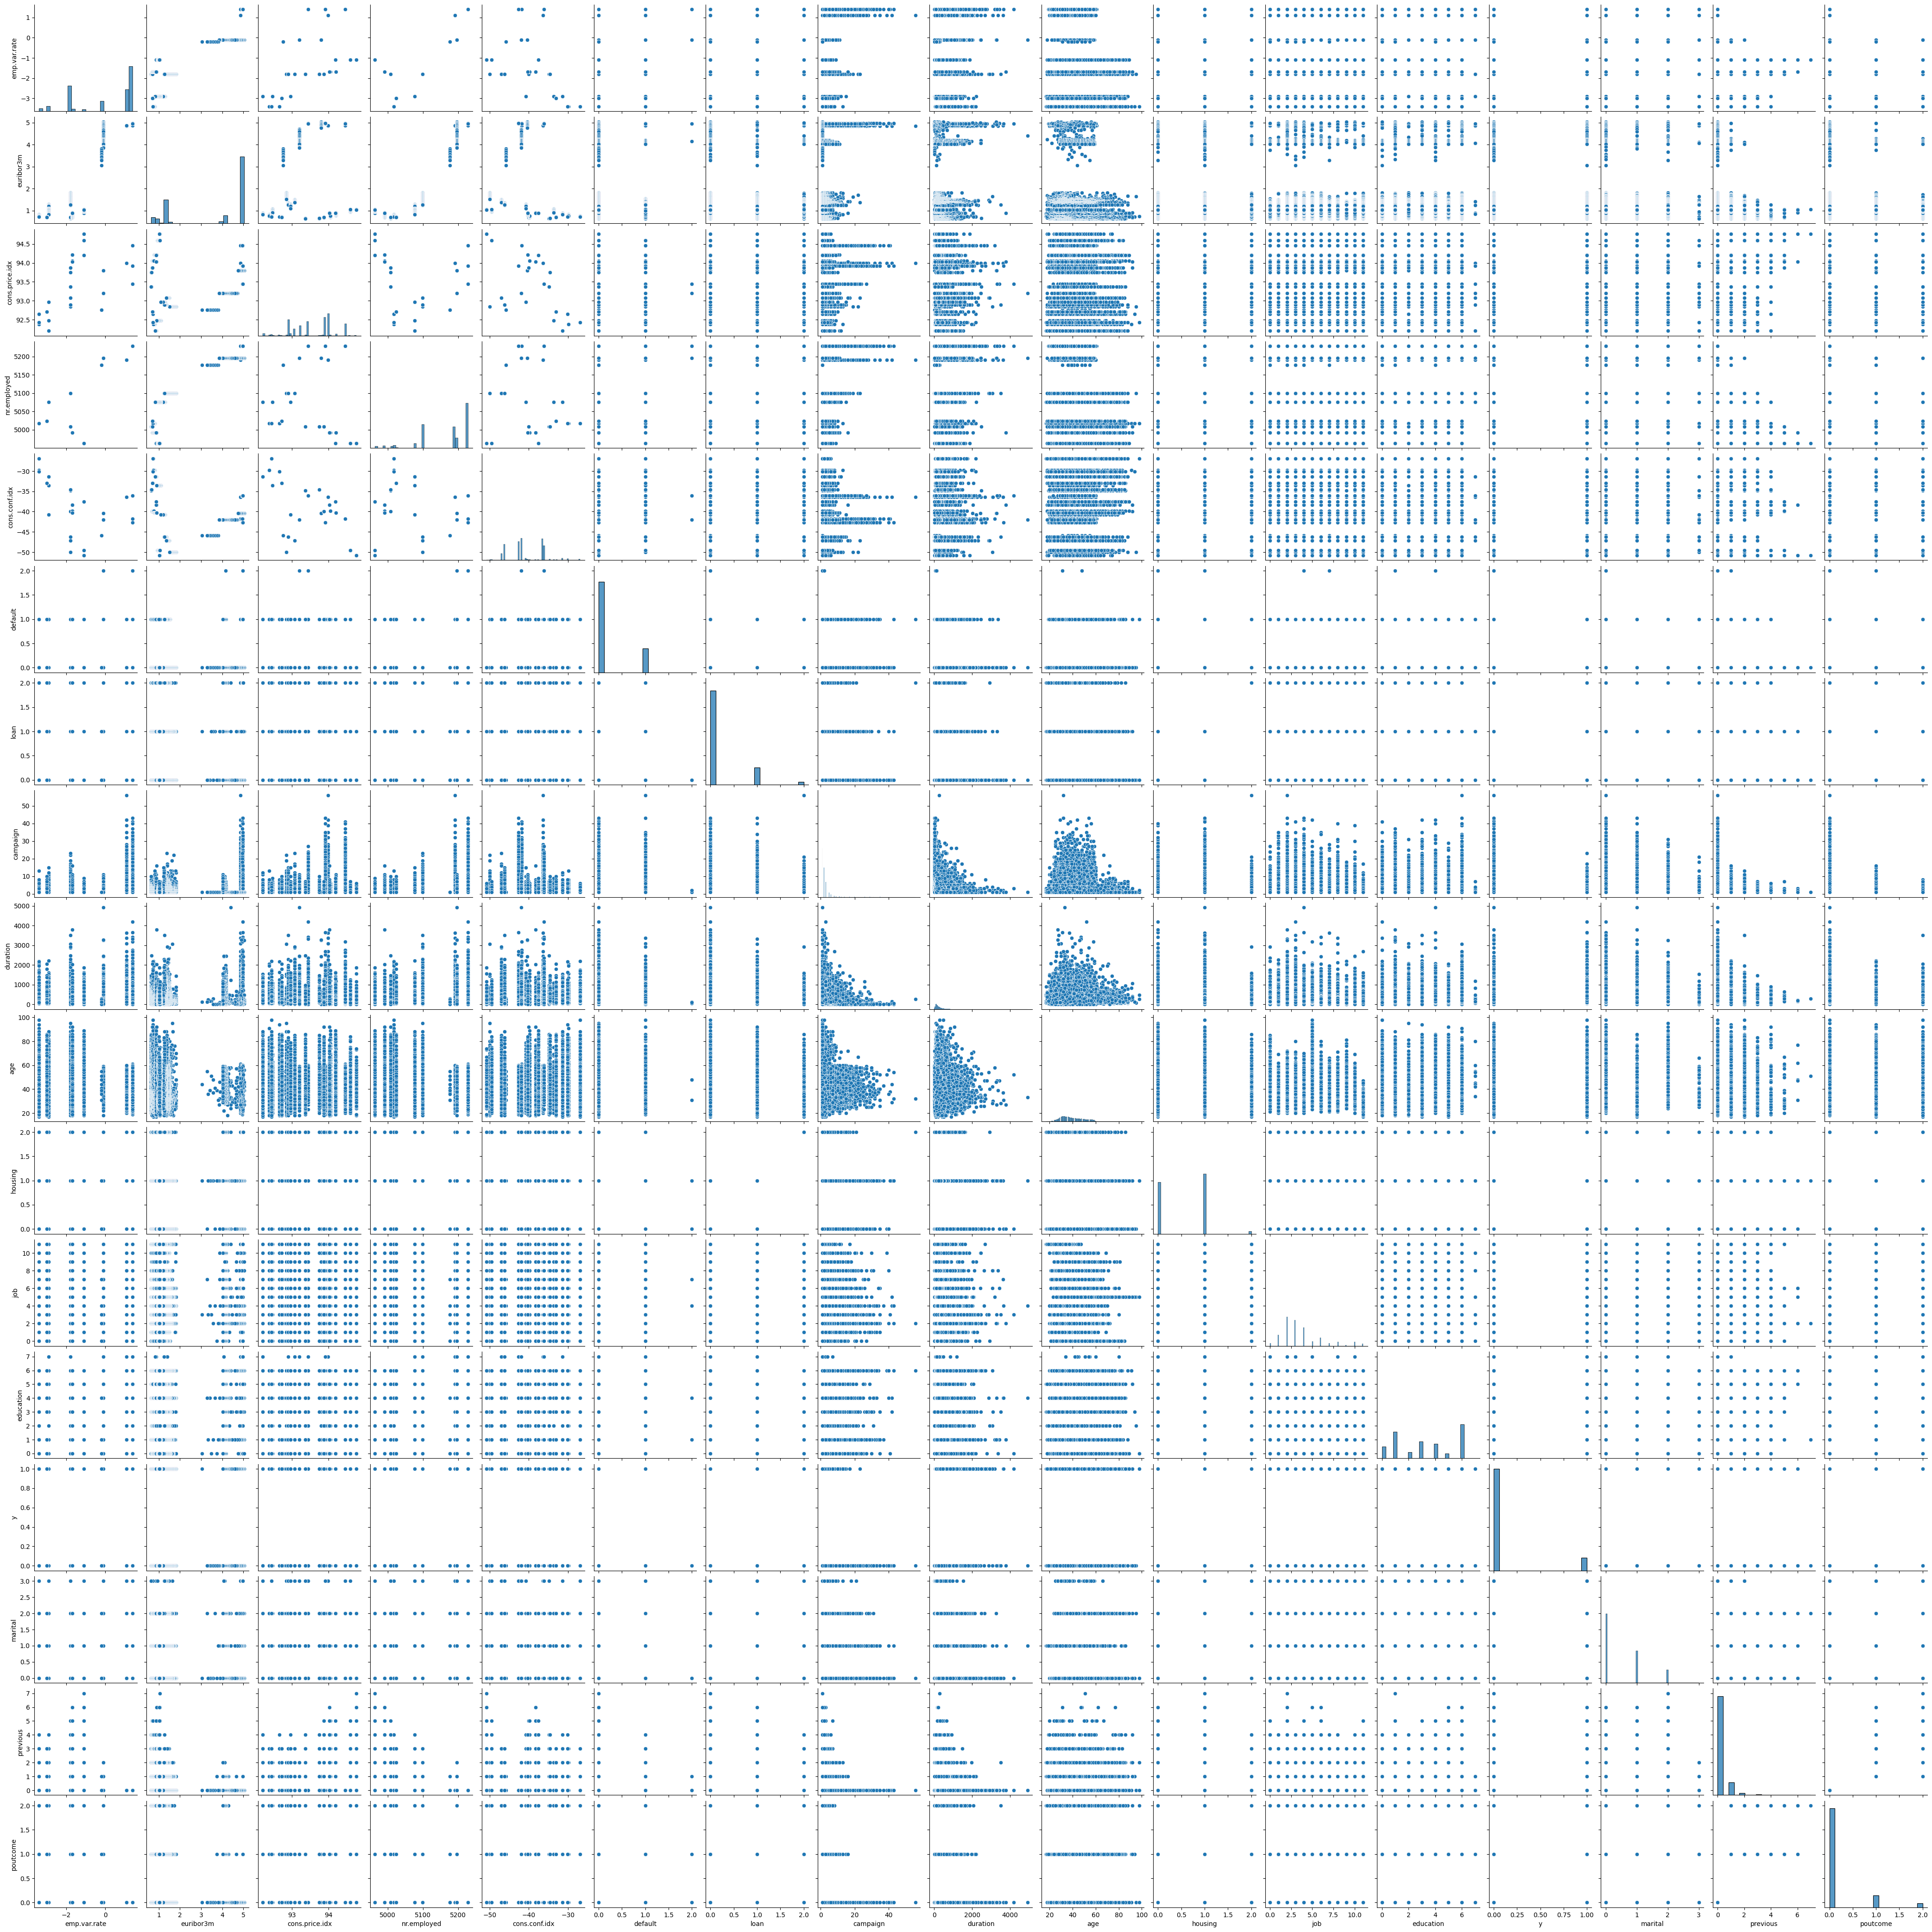

In [15]:
# STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap + Pairplot)

# Copy of previous DataFrame
df_S7_4 = df_S5.copy()

# Encode categorical variables using the Series.factorize() method
for col in category_var:
    codes, uniques = df_S7_4[col].factorize()
    df_S7_4[col] = codes  # replace column with integer codes

# CATEGORY VARIABLES HEATMAP
if len(category_var) > 1:
    corr_cat = df_S7_4[category_var].corr()
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    plt.title("ONLY CATEGORY VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_cat,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough categorical variables for a correlation matrix.")

# NUMERIC VARIABLES HEATMAP
if len(numeric_var) > 1:
    corr_num = df_S7_4[numeric_var].corr()
    fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
    plt.title("ONLY NUMERIC VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
    sns.heatmap(
        data=corr_num,
        annot=True,
        vmin=-1,
        vmax=1,
        fmt=".2f",
        annot_kws={"size": my_font_size}
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric variables for a correlation matrix.")

# ALL VARIABLES HEATMAP
corr_matrix = df_S7_4.corr()
corr_order = corr_matrix.mean().sort_values(ascending=False).index
corr_matrix = corr_matrix.loc[corr_order, corr_order]

fig = plt.figure(figsize=(2 * figWidth_unit, 2 * figHeight_unit))
plt.title("ALL VARIABLES", fontsize=my_font_size + 2, fontweight="bold")
sns.heatmap(
    data=corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    annot_kws={"size": my_font_size}
)
plt.tight_layout()
plt.show()

# --- PAIRPLOT (sorted by correlation order) ---
fig = plt.figure(figsize=(figWidth_unit, figHeight_unit))
sns.pairplot(data=df_S7_4[corr_order])
plt.show()

In [ ]:
# STEP 7.5) REMOVE ATTRIBUTES TO AVOID NOISE

# Copy of previous DataFrame
df_S7_5 = df_S5.copy()

# Correlation level considered as "too high"
corr_threshold = 0.9  

# Detect highly correlated numeric features
corr_matrix = df_S7_5[numeric_var].corr().abs()  # Absolute values for correlation strength

# Create an empty set to store columns to drop
to_drop = set()

# Iterate through correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > corr_threshold:
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            # Drop one of the two correlated columns (keep the first, drop the second)
            if col_i not in to_drop:
                to_drop.add(col_i)

# Drop the detected "noisy" attributes
if to_drop:
    df_S7_5 = df_S7_5.drop(columns=list(to_drop), axis=1)
    print(f"- ⚠️ High correlation detected (> {corr_threshold}). The following attributes were dropped:")
    for col in to_drop:
        print(f"   • {col}")
else:
    print(f"- ✅ No attributes exceeded the correlation threshold of {corr_threshold}. Nothing was dropped.")

# Display summary information
print(f"- ℹ️ Previous df's columns: {len(df_S5.columns)}")
print(f"- ℹ️ Cleaned df's  columns: {len(df_S7_5.columns)}")
print(f"- ℹ️ Final DataFrame shape: {df_S7_5.shape}")

display(df_S7_5.head())


- ⚠️ High correlation detected (> 0.9). The following attributes were dropped:
   • nr.employed
   • euribor3m
- ℹ️ Previous df's columns: 17
- ℹ️ Cleaned df's  columns: 15
- ℹ️ Final DataFrame shape: (41188, 15)


age        job  marital    education  default housing loan  duration  \
0   56  housemaid  married     basic.4y       no      no   no       261   
1   57   services  married  high.school  unknown      no   no       149   
2   37   services  married  high.school       no     yes   no       226   
3   40     admin.  married     basic.6y       no      no   no       151   
4   56   services  married  high.school       no      no  yes       307   

   campaign  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1         0  nonexistent           1.1          93.994   
1         1         0  nonexistent           1.1          93.994   
2         1         0  nonexistent           1.1          93.994   
3         1         0  nonexistent           1.1          93.994   
4         1         0  nonexistent           1.1          93.994   

   cons.conf.idx   y  
0          -36.4  no  
1          -36.4  no  
2          -36.4  no  
3          -36.4  no  
4          -36.4  no

In [ ]:
# STEP 8.1) DEFINE OUTLIERS

# Copy  of previous DataFrame
df_S8_1=df_S7_5.copy()

# Print info
display(df_S8_1.describe())

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_var:
    if col in df_S8_1.columns.to_list():
        cols.append(col)

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []
extreme_lower_limits = []
extreme_upper_limits = []
n_extreme_outliers_lower = []
n_extreme_outliers_upper = []
pct_extreme_outliers_lower = []
pct_extreme_outliers_upper = []

len(df_S8_1.index)

for col in cols:
    Q1 = df_S8_1[col].quantile(0.25)
    Q3 = df_S8_1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    extreme_lower = Q1 - 3 * IQR
    extreme_upper = Q3 + 3 * IQR

    # Count num of outliers
    n_low = (df_S8_1[col] < lower).sum()
    n_high = (df_S8_1[col] > upper).sum()
    n_extreme_low = (df_S8_1[col] < extreme_lower).sum()
    n_extreme_high = (df_S8_1[col] > extreme_upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S8_1.index)) * 100
    pct_high = (n_high / len(df_S8_1.index)) * 100
    pct_extreme_low = (n_extreme_low / len(df_S8_1.index)) * 100
    pct_extreme_high = (n_extreme_high / len(df_S8_1.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)
    extreme_lower_limits.append(extreme_lower)
    extreme_upper_limits.append(extreme_upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)
    n_extreme_outliers_lower.append(n_extreme_low)
    n_extreme_outliers_upper.append(n_extreme_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)
    pct_extreme_outliers_lower.append(pct_extreme_low)
    pct_extreme_outliers_upper.append(pct_extreme_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
df_extreme_limits = pd.DataFrame(
    [
        extreme_lower_limits,
        extreme_upper_limits,
        n_extreme_outliers_lower,
        n_extreme_outliers_upper,
        pct_extreme_outliers_lower,
        pct_extreme_outliers_upper
    ],
    columns=cols,
    index=[
        "extreme_lower_limit",
        "extreme_upper_limit",
        "n_extreme_outliers_lower",
        "n_extreme_outliers_upper",
        "pct_extreme_outliers_lower",
        "pct_extreme_outliers_upper"
    ]
)
# Display results
display(df_limits)
display(df_extreme_limits)

age      duration      campaign      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593      0.172963      0.081886   
std       10.42125    259.279249      2.770014      0.494901      1.570960   
min       17.00000      0.000000      1.000000      0.000000     -3.400000   
25%       32.00000    102.000000      1.000000      0.000000     -1.800000   
50%       38.00000    180.000000      2.000000      0.000000      1.100000   
75%       47.00000    319.000000      3.000000      0.000000      1.400000   
max       98.00000   4918.000000     56.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx  
count    41188.000000   41188.000000  
mean        93.575664     -40.502600  
std          0.578840       4.628198  
min         92.201000     -50.800000  
25%         93.075000     -42.700000  
50%         93.749000     -41.800000  
75%         93.994000     -36.400000  
max         94.767000     -26.900000

Estas son las columnas
['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']


age     duration     campaign    previous  \
lower_limit           9.500000  -223.500000    -2.000000     0.00000   
upper_limit          69.500000   644.500000     6.000000     0.00000   
n_outliers_lower      0.000000     0.000000     0.000000     0.00000   
n_outliers_upper    469.000000  2963.000000  2406.000000  5625.00000   
pct_outliers_lower    0.000000     0.000000     0.000000     0.00000   
pct_outliers_upper    1.138681     7.193843     5.841507    13.65689   

                    emp.var.rate  cons.price.idx  cons.conf.idx  
lower_limit                 -6.6         91.6965     -52.150000  
upper_limit                  6.2         95.3725     -26.950000  
n_outliers_lower             0.0          0.0000       0.000000  
n_outliers_upper             0.0          0.0000     447.000000  
pct_outliers_lower           0.0          0.0000       0.000000  
pct_outliers_upper           0.0          0.0000       1.085268

age     duration     campaign    previous  \
extreme_lower_limit        -13.000000  -549.000000    -5.000000     0.00000   
extreme_upper_limit         92.000000   970.000000     9.000000     0.00000   
n_extreme_outliers_lower     0.000000     0.000000     0.000000     0.00000   
n_extreme_outliers_upper     4.000000  1043.000000  1094.000000  5625.00000   
pct_extreme_outliers_lower   0.000000     0.000000     0.000000     0.00000   
pct_extreme_outliers_upper   0.009712     2.532291     2.656113    13.65689   

                            emp.var.rate  cons.price.idx  cons.conf.idx  
extreme_lower_limit                -11.4          90.318          -61.6  
extreme_upper_limit                 11.0          96.751          -17.5  
n_extreme_outliers_lower             0.0           0.000            0.0  
n_extreme_outliers_upper             0.0           0.000            0.0  
pct_extreme_outliers_lower           0.0           0.000            0.0  
pct_extreme_outliers_upper           0.0           0.000            0.0

CONCLUSIONS:
- previous have too many upper outliers, even extreme outliers, to drop that data
- I goint to stablish a "cut" based on extreme upper outliers, because if we focus "just in normal ouliers" we would loose a lot of data
- The "cut" would be for a maximum of 3 %, higher that than that, extreme outliers will not be dropped

In [33]:
# STEP 8.2) CLEAN OUTLIERS

# Copy  of previous DataFrame
df_S8_2=df_S8_1.copy()

# Outliers detection is applied over numeric attributes
cols = []
for col in numeric_var:
    if col in df_S8_2.columns.to_list():
        cols.append(col)

low_outliers_threshold = 3.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 3.0  # [% ]Max percentage of upper outliers allowed to remove
removal_type = "EXTREME OUTLIERS" # Removal logic type (NORMAL or EXTREME outliers)

if removal_type == "NORMAL OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_limits.loc["lower_limit", col]
        high_limit = df_limits.loc["upper_limit", col]
        pct_low = df_limits.loc["pct_outliers_lower", col]
        pct_high = df_limits.loc["pct_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low <= low_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
            print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high <= up_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
            print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")
elif removal_type == "EXTREME OUTLIERS":
    # Loop through each column and apply filtering rules
    for col in cols:
        low_limit = df_extreme_limits.loc["extreme_lower_limit", col]
        high_limit = df_extreme_limits.loc["extreme_upper_limit", col]
        pct_low = df_extreme_limits.loc["pct_extreme_outliers_lower", col]
        pct_high = df_extreme_limits.loc["pct_extreme_outliers_upper", col]
        
        # Remove low outliers if below threshold
        print(f"- ATTRIBUTE {col}:")
        if pct_low <= low_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
            print(f" - ⚠️ REMOVED extreme lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
        
        # Remove high outliers if below threshold
        if pct_high <= up_outliers_threshold:
            df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
            print(f" - ⚠️ REMOVED extreme upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
        else:
            print(f" - ✅ KEPT extreme upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
        print("\n")

print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8_1)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S8_2)}")
display(df_S8_2.describe())

- ATTRIBUTE age:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 3.0%)
 - ⚠️ REMOVED extreme upper outliers (0.01% <= 3.0%)


- ATTRIBUTE duration:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 3.0%)
 - ⚠️ REMOVED extreme upper outliers (2.53% <= 3.0%)


- ATTRIBUTE campaign:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 3.0%)
 - ⚠️ REMOVED extreme upper outliers (2.66% <= 3.0%)


- ATTRIBUTE previous:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 3.0%)
 - ✅ KEPT extreme upper outliers (13.66% > 3.0%)


- ATTRIBUTE emp.var.rate:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 3.0%)
 - ⚠️ REMOVED extreme upper outliers (0.00% <= 3.0%)


- ATTRIBUTE cons.price.idx:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 3.0%)
 - ⚠️ REMOVED extreme upper outliers (0.00% <= 3.0%)


- ATTRIBUTE cons.conf.idx:
 - ⚠️ REMOVED extreme lower outliers (0.00% <= 3.0%)
 - ⚠️ REMOVED extreme upper outliers (0.00% <= 3.0%)


- ✅Outliers cleaning completed.
 - ℹ️ Original df's rows: 41188
 - ℹ️ Cleaned df's  

age      duration      campaign      previous  emp.var.rate  \
count  39071.000000  39071.000000  39071.000000  39071.000000  39071.000000   
mean      40.024724    233.033785      2.227509      0.178342      0.051701   
std       10.436737    184.621654      1.623562      0.502395      1.577132   
min       17.000000      0.000000      1.000000      0.000000     -3.400000   
25%       32.000000    103.000000      1.000000      0.000000     -1.800000   
50%       38.000000    177.000000      2.000000      0.000000      1.100000   
75%       47.000000    305.000000      3.000000      0.000000      1.400000   
max       92.000000    970.000000      9.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx  
count    39071.000000   39071.000000  
mean        93.565725     -40.500878  
std          0.579692       4.659277  
min         92.201000     -50.800000  
25%         93.075000     -42.700000  
50%         93.444000     -41.800000  
75%         93.994000     -36.400000  
max         94.767000     -26.900000

In [34]:
# STEP 9) MISSING VALUES

# Copy  of previous DataFrame
df_S9 = df_S8_2.copy()

th_fill = 5.0   # [%] If missing perc > th_fill → fill by grouped median, otherwise drop rows

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_var:
    if df_S9[col].nunique() < 6:
        group_vars.append(col)

# Calculate percentage of missing values per column
missing_pct = (df_S9.isnull().sum() / len(df_S9)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all")
else:
    # Process each column with missing data
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # Case 1: Fill with grouped median if percentage above threshold
        if pct > th_fill and len(group_vars) > 0:
            print(f" - ⚠️ FILLED missing values in {col} using grouped median by {group_vars}...\n")

            # Compute median by group
            medians = df_S9.groupby(group_vars)[col].median().reset_index()
            medians = medians.rename(columns={col: f"median_{col}"})

            # Merge medians back into df
            df_S9 = pd.merge(df_S9, medians, on=group_vars, how="left")

            # Fill missing values
            df_S9[col] = df_S9[col].fillna(df_S9[f"median_{col}"])

            # Drop helper column
            df_S9 = df_S9.drop(columns=[f"median_{col}"])

        # Case 2: Drop rows if percentage below or equal to threshold
        elif pct <= th_fill:
            print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {th_fill}%)...\n")
            df_S9 = df_S9.dropna(subset=[col])

        # Case 3: Skip if no suitable grouping columns
        else:
            print(f" - ℹ️ No suitable group columns found — skipping fill for {col}.\n")

# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S9.isnull().sum()}")

- ✅ DataFrame has no missing values at all
- ℹ️ Remaining missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64


In [35]:
# SPLIT)

# Copy  of previous DataFrame
df_SPLIT = df_S9.copy()

my_test_size = 0.2
random_seed = 42

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (31256, 14)
 - X_test: (7815, 14)
 - y_train: (31256,)
 - y_test: (7815,)

- ℹ️ Content of DataFrames after SPLIT:
 - X_train:
        age            job  marital          education  default housing loan  \
31200   36   entrepreneur  married  university.degree       no     yes   no   
7034    38  self-employed  married            unknown       no     yes   no   
9975    40    blue-collar  married           basic.4y  unknown      no   no   
20139   36         admin.  married  university.degree       no     yes   no   
8784    35    blue-collar  married           basic.9y       no     yes  yes   

       duration  campaign  previous     poutcome  emp.var.rate  \
31200       187         1         1      failure          -1.8   
7034        118         1         0  nonexistent           1.1   
9975        105         3         0  nonexistent           1.4   
20139        56         2         0  nonexistent           1.4   
8784         97  

In [36]:
# SCALER) StandardScaler

# Copy  of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

# List of columns
columns = X_train_es.columns.tolist()

# Instance scaler for each category attribute
scaler_dic = {}
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler = StandardScaler()
        scaler_dic[columns[i]] = scaler
print("- ✅ All Scalers have been instanced successfully")

# Train scaler with ONLY train data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_dic[columns[i]].fit(X_train_es[[columns[i]]])
print("- ✅ All Scalers have been trained successfully")

# Apply scaler to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        # Transform both sets
        X_train_es_aux = scaler_dic[columns[i]].transform(X_train_es[[columns[i]]])
        X_test_es_aux = scaler_dic[columns[i]].transform(X_test_es[[columns[i]]])
        # Determine column_name based on scaler type
        new_col_name = columns[i] +"_SS"
        # Convert to DataFrame
        X_train_es_aux = pd.DataFrame(X_train_es_aux, index=X_train_es.index, columns=[new_col_name])
        X_test_es_aux = pd.DataFrame(X_test_es_aux, index=X_test_es.index, columns=[new_col_name])
         # Concatenate back
        X_train_es = pd.concat([X_train_es, X_train_es_aux], axis=1)
        X_test_es = pd.concat([X_test_es, X_test_es_aux], axis=1)
        print("- ✅ Train and Test data have been scaled for: " + columns[i])

# Keep only scaled columms
scaled_cols = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaled_cols.append(columns[i] + "_SS")
X_train_es = X_train_es[scaled_cols]
X_test_es = X_test_es[scaled_cols]

display(X_train_es.head())

- ✅ All Scalers have been instanced successfully
- ✅ All Scalers have been trained successfully
- ✅ Train and Test data have been scaled for: age
- ✅ Train and Test data have been scaled for: duration
- ✅ Train and Test data have been scaled for: campaign
- ✅ Train and Test data have been scaled for: previous
- ✅ Train and Test data have been scaled for: emp.var.rate
- ✅ Train and Test data have been scaled for: cons.price.idx
- ✅ Train and Test data have been scaled for: cons.conf.idx


age_SS  duration_SS  campaign_SS  previous_SS  emp.var.rate_SS  \
31200 -0.388631    -0.247543    -0.755498     1.618391        -1.171605   
7034  -0.196634    -0.621984    -0.755498    -0.356637         0.665076   
9975  -0.004638    -0.692531     0.473494    -0.356637         0.855078   
20139 -0.388631    -0.958437    -0.141002    -0.356637         0.855078   
8784  -0.484630    -0.735944    -0.755498    -0.356637         0.855078   

       cons.price.idx_SS  cons.conf.idx_SS  
31200          -1.157929         -1.221345  
7034            0.738522          0.879701  
9975            1.549811         -0.278018  
20139          -0.208842          0.944019  
8784            1.549811         -0.278018

In [37]:
# ENCONDER) LabelEncoder

# Copy  of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

# List of columns
columns = X_train_en.columns.tolist()

# Instance encoder for each category attribute
enconder_dic = {}
for i in range(len(columns)):
    if columns[i] in category_var:
        encoder = LabelEncoder()
        enconder_dic[columns[i]] = encoder
print("- ✅ All Encoders have been instanced successfully")

# Train encoder with ONLY train data
for i in range(len(columns)):
    if columns[i] in category_var:
        enconder_dic[columns[i]].fit(X_train_en[columns[i]])
print("- ✅ All Encoders have been trained successfully")

# Apply encoder to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in category_var:
        X_train_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_train_en[columns[i]])
        X_test_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_test_en[columns[i]])
        print("- ✅ Train and Test data have been enconded for: " + columns[i])

# Keep only encoded columms
encoded_cols = []
for i in range(len(columns)):
    if columns[i] in category_var:
        encoded_cols.append(columns[i] + "_LE")
X_train_en = X_train_en[encoded_cols]
X_test_en = X_test_en[encoded_cols]

X_train_en.head()

- ✅ All Encoders have been instanced successfully
- ✅ All Encoders have been trained successfully
- ✅ Train and Test data have been enconded for: job
- ✅ Train and Test data have been enconded for: marital
- ✅ Train and Test data have been enconded for: education
- ✅ Train and Test data have been enconded for: default
- ✅ Train and Test data have been enconded for: housing
- ✅ Train and Test data have been enconded for: loan
- ✅ Train and Test data have been enconded for: poutcome


job_LE  marital_LE  education_LE  default_LE  housing_LE  loan_LE  \
31200       2           1             6           0           2        0   
7034        6           1             7           0           2        0   
9975        1           1             0           1           0        0   
20139       0           1             6           0           2        0   
8784        1           1             2           0           2        2   

       poutcome_LE  
31200            0  
7034             1  
9975             1  
20139            1  
8784             1

In [38]:
# ASSEMBLED DATAFRAMES) X_train_assembled & X_test_assembled

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())


 🧮 X_train_assembled (31256, 14)


age_SS  duration_SS  campaign_SS  previous_SS  emp.var.rate_SS  \
31200 -0.388631    -0.247543    -0.755498     1.618391        -1.171605   
7034  -0.196634    -0.621984    -0.755498    -0.356637         0.665076   
9975  -0.004638    -0.692531     0.473494    -0.356637         0.855078   
20139 -0.388631    -0.958437    -0.141002    -0.356637         0.855078   
8784  -0.484630    -0.735944    -0.755498    -0.356637         0.855078   

       cons.price.idx_SS  cons.conf.idx_SS  job_LE  marital_LE  education_LE  \
31200          -1.157929         -1.221345       2           1             6   
7034            0.738522          0.879701       6           1             7   
9975            1.549811         -0.278018       1           1             0   
20139          -0.208842          0.944019       0           1             6   
8784            1.549811         -0.278018       1           1             2   

       default_LE  housing_LE  loan_LE  poutcome_LE  
31200           0           2        0            0  
7034            0           2        0            1  
9975            1           0        0            1  
20139           0           2        0            1  
8784            0           2        2            1


 🧮 X_test_assembled (7815, 14)


age_SS  duration_SS  campaign_SS  previous_SS  emp.var.rate_SS  \
36562  2.779315    -0.502597    -0.141002    -0.356637        -1.868277   
1957  -0.004638     0.571884     1.087989    -0.356637         0.665076   
31004  0.667351     1.282778    -0.141002     1.618391        -1.171605   
34432  0.571352    -0.681677     1.087989     1.618391        -1.171605   
29529  1.339339     2.525486    -0.755498    -0.356637        -1.171605   

       cons.price.idx_SS  cons.conf.idx_SS  job_LE  marital_LE  education_LE  \
36562          -1.037355         -0.063626       2           1             3   
1957            0.738522          0.879701       1           1             7   
31004          -1.157929         -1.221345       4           1             6   
34432          -1.157929         -1.221345       7           1             3   
29529          -0.844437         -1.414298       9           1             5   

       default_LE  housing_LE  loan_LE  poutcome_LE  
36562           0           0        0            1  
1957            0           0        0            1  
31004           0           2        0            0  
34432           0           0        0            0  
29529           1           2        0            1

In [39]:
# FEATURE SELECTION) X_train_final & X_test_final

feature_keeping_threshold = 100 # [%] Percentaje of features to keep (SelectKBest) 

# Copy  of previous DataFrame
X_train_final = X_train_assembled.copy()
X_test_final = X_test_assembled.copy()

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_final.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_final, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_final = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[keeping_mask])
X_test_final = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_final", X_train_final.shape)
display(X_train_final.head())
print("\n 🧮 X_test_final", X_test_final.shape)
display(X_test_final.head())

- ✅ Selector have been instanced successfully to keep 14 features
- ✅ Selector have been trained successfully

 🧮 X_train_final (31256, 14)


age_SS  duration_SS  campaign_SS  previous_SS  emp.var.rate_SS  \
0 -0.388631    -0.247543    -0.755498     1.618391        -1.171605   
1 -0.196634    -0.621984    -0.755498    -0.356637         0.665076   
2 -0.004638    -0.692531     0.473494    -0.356637         0.855078   
3 -0.388631    -0.958437    -0.141002    -0.356637         0.855078   
4 -0.484630    -0.735944    -0.755498    -0.356637         0.855078   

   cons.price.idx_SS  cons.conf.idx_SS  job_LE  marital_LE  education_LE  \
0          -1.157929         -1.221345     2.0         1.0           6.0   
1           0.738522          0.879701     6.0         1.0           7.0   
2           1.549811         -0.278018     1.0         1.0           0.0   
3          -0.208842          0.944019     0.0         1.0           6.0   
4           1.549811         -0.278018     1.0         1.0           2.0   

   default_LE  housing_LE  loan_LE  poutcome_LE  
0         0.0         2.0      0.0          0.0  
1         0.0         2.0      0.0          1.0  
2         1.0         0.0      0.0          1.0  
3         0.0         2.0      0.0          1.0  
4         0.0         2.0      2.0          1.0


 🧮 X_test_final (7815, 14)


age_SS  duration_SS  campaign_SS  previous_SS  emp.var.rate_SS  \
0  2.779315    -0.502597    -0.141002    -0.356637        -1.868277   
1 -0.004638     0.571884     1.087989    -0.356637         0.665076   
2  0.667351     1.282778    -0.141002     1.618391        -1.171605   
3  0.571352    -0.681677     1.087989     1.618391        -1.171605   
4  1.339339     2.525486    -0.755498    -0.356637        -1.171605   

   cons.price.idx_SS  cons.conf.idx_SS  job_LE  marital_LE  education_LE  \
0          -1.037355         -0.063626     2.0         1.0           3.0   
1           0.738522          0.879701     1.0         1.0           7.0   
2          -1.157929         -1.221345     4.0         1.0           6.0   
3          -1.157929         -1.221345     7.0         1.0           3.0   
4          -0.844437         -1.414298     9.0         1.0           5.0   

   default_LE  housing_LE  loan_LE  poutcome_LE  
0         0.0         0.0      0.0          1.0  
1         0.0         0.0      0.0          1.0  
2         0.0         2.0      0.0          0.0  
3         0.0         0.0      0.0          0.0  
4         1.0         2.0      0.0          1.0

In [40]:
# FINAL STEP) SAVE PROCESSED DATA

# Output path to save the data
output_path = "../data/processed/"

output_path_train = output_path + "X_train_final.csv"
output_path_test = output_path + "X_test_final.csv"

X_train_final.to_csv(output_path_train, index=False)
X_test_final.to_csv(output_path_test, index=False)

print("- ✅ File saved at:", output_path)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")


- ✅ File saved at: ../data/processed/
- 💡 Reminder: data/processed folder is ignored in .gitignore
